In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
%matplotlib inline 

In [2]:
allData = pd.read_csv('tillageTestSummaryResult.csv')
allData.head()
print(f'Speed:{allData.speed_mph.unique()}')
print(f'Front disk:{allData.disk_in.unique()}')
print(f'Closing disk:{allData.closeDisk.unique()}')
print(f'Basket:{allData.basket.unique()}')

Speed:[3.  6.6]
Front disk:[3 5 1 7]
Closing disk:[-6  2  6]
Basket:[1 0]


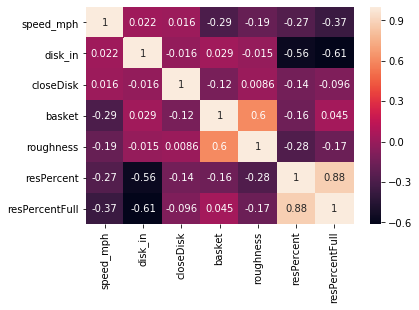

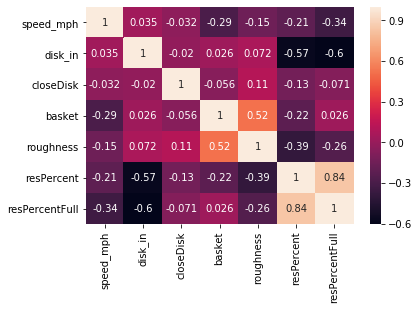

In [36]:
dataset=allData[['speed_mph','disk_in','closeDisk','basket','roughness','resPercent','resPercentFull']]
corr1=dataset.corr()
sns.heatmap(corr1, annot=True)
plt.figure()
corr2=dataset.corr(method='spearman')
sns.heatmap(corr2, annot=True)

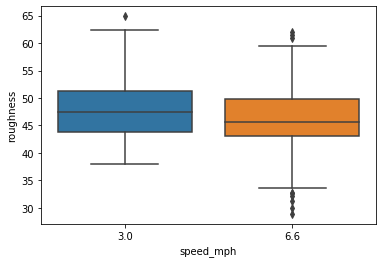

In [4]:
sns.boxplot(x="speed_mph", y="roughness", data=dataset)

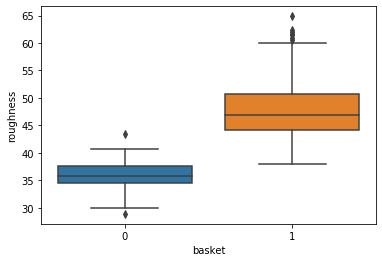

In [5]:
sns.boxplot(x="basket", y="roughness", data=dataset)

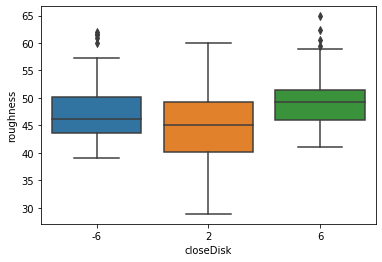

In [6]:
sns.boxplot(x="closeDisk", y="roughness", data=dataset)

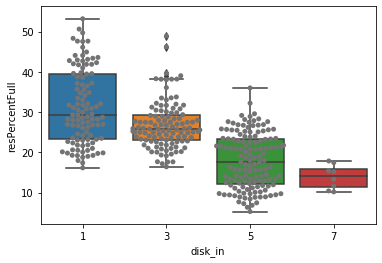

In [7]:
sns.boxplot(x="disk_in", y="resPercentFull", data=dataset)
sns.swarmplot(x="disk_in", y="resPercentFull", data=dataset, color=".45")

In [66]:
def genModels(X,Y):
    # Split dataset into Training set and Test set
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5,random_state=5)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # ElasticNet model
    eNet=ElasticNetCV(cv=15,random_state=0)
    eNet.fit(X_train,Y_train)
    YNet_pred = eNet.predict(X_test)
    r_2=metrics.r2_score(Y_test,YNet_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, YNet_pred)))
    print(f'Enet\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {eNet.coef_}')
    
    # Lasso Model
    las = Lasso(alpha=.1)
    las.fit(X_train,Y_train)
    Ylas_pred = las.predict(X_test)
    r_2=metrics.r2_score(Y_test,Ylas_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Ylas_pred)))
    print(f'Lasso\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {las.coef_}')
    
    # Ridge model
    ridge = Ridge(alpha=.1)
    ridge.fit(X_train,Y_train)
    Yridge_pred = ridge.predict(X_test)
    r_2=metrics.r2_score(Y_test,Yridge_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Yridge_pred)))
    print(f'Ridge\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {ridge.coef_}')
    
    
    # SVR model
    rbf = svm.SVR(kernel='linear', C=110, gamma=0.4, epsilon=1.9)
    rbf.fit(X_train,Y_train) 
    Yrbf_pred = rbf.predict(X_test)
    r_2=metrics.r2_score(Y_test,Yrbf_pred)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Yrbf_pred)))
    print(f'SVR\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {rbf.coef_}')
    
    # linear model 
    lin=LinearRegression()
    lin.fit(X_train,Y_train)
    Ylin_pred = lin.predict(X_test)
    rmse = (np.sqrt(metrics.mean_squared_error(Y_test, Ylin_pred)))
    r_2=metrics.r2_score(Y_test,Ylin_pred)
    print(f'Linear\t- RMSE: {rmse:.3f}, R^2: {r_2:.3f}, coef: {lin.coef_}')

In [67]:
#roughness models with 4 factors
genModels(dataset[['speed_mph','closeDisk','disk_in','basket']], dataset['roughness'])

Enet	- RMSE: 4.552, R^2: 0.446, coef: [-0.16617529  0.5083524  -0.27826998  2.95291747]
Lasso	- RMSE: 4.548, R^2: 0.448, coef: [-0.08891737  0.44835756 -0.21343402  2.96050628]
Ridge	- RMSE: 4.541, R^2: 0.449, coef: [-0.17295786  0.55276735 -0.30955592  3.05233917]
SVR	- RMSE: 4.569, R^2: 0.442, coef: [[-0.24334038  0.74915151  0.41539481  2.75210198]]
Linear	- RMSE: 4.541, R^2: 0.449, coef: [-0.1726292   0.55322843 -0.30974961  3.05416945]


In [68]:
#roughness models with 2 factors
genModels(dataset[['speed_mph','basket']], dataset['roughness'])

Enet	- RMSE: 4.562, R^2: 0.444, coef: [-0.15344055  2.91851538]
Lasso	- RMSE: 4.565, R^2: 0.443, coef: [-0.07693975  2.91012007]
Ridge	- RMSE: 4.552, R^2: 0.447, coef: [-0.15756373  2.98867132]
SVR	- RMSE: 4.537, R^2: 0.450, coef: [[0.12755749 2.86951629]]
Linear	- RMSE: 4.551, R^2: 0.447, coef: [-0.15722323  2.99041527]


In [69]:
#surface residue models with 2 factors
genModels(dataset[['speed_mph','closeDisk','disk_in','basket']], dataset['resPercentFull'])

Enet	- RMSE: 7.057, R^2: 0.507, coef: [-3.31178337 -1.13280081 -4.89813625 -0.77104925]
Lasso	- RMSE: 7.051, R^2: 0.508, coef: [-3.25017232 -1.05300003 -4.87488074 -0.67313522]
Ridge	- RMSE: 7.045, R^2: 0.509, coef: [-3.37961509 -1.16974769 -4.97975946 -0.81233423]
SVR	- RMSE: 7.046, R^2: 0.509, coef: [[-3.0670536  -1.03076445 -4.99363449 -0.78863723]]
Linear	- RMSE: 7.045, R^2: 0.509, coef: [-3.38175087 -1.1706461  -4.98261384 -0.81329374]


In [70]:
#surface residue models with 4 factors
genModels(dataset[['speed_mph','closeDisk','disk_in','basket']], dataset['resPercentFull'])

Enet	- RMSE: 7.057, R^2: 0.507, coef: [-3.31178337 -1.13280081 -4.89813625 -0.77104925]
Lasso	- RMSE: 7.051, R^2: 0.508, coef: [-3.25017232 -1.05300003 -4.87488074 -0.67313522]
Ridge	- RMSE: 7.045, R^2: 0.509, coef: [-3.37961509 -1.16974769 -4.97975946 -0.81233423]
SVR	- RMSE: 7.046, R^2: 0.509, coef: [[-3.0670536  -1.03076445 -4.99363449 -0.78863723]]
Linear	- RMSE: 7.045, R^2: 0.509, coef: [-3.38175087 -1.1706461  -4.98261384 -0.81329374]


In [71]:
#surface residue models with 2 factors
genModels(dataset[['speed_mph','disk_in']], dataset['resPercentFull'])

Enet	- RMSE: 7.077, R^2: 0.505, coef: [-3.1766291  -4.83298932]
Lasso	- RMSE: 7.084, R^2: 0.504, coef: [-3.12974013 -4.80693426]
Ridge	- RMSE: 7.060, R^2: 0.507, coef: [-3.23011246 -4.90639515]
SVR	- RMSE: 7.092, R^2: 0.502, coef: [[-3.08642267 -4.87835677]]
Linear	- RMSE: 7.059, R^2: 0.507, coef: [-3.23196723 -4.90916133]
